# Examen de certificación – Intento 2

**Descripción**
**Instrucciones para examen**
**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

**Diccionario de Datos:**

1. **Pregnancies:** Número de embarazos.
2. **Glucose:** Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
3. **BloodPressure:** Presión arterial diastólica (mm Hg).
4. **SkinThickness:** Espesor del pliegue cutáneo del tríceps (mm).
5. **Insulin:** Niveles séricos de insulina a las 2 horas (mu U/ml).
6. **BMI:** Índice de masa corporal (peso en kg / (altura en m)^2).
7. **DiabetesPedigreeFunction:** Función de pedigrí de diabetes.
8. **Age:** Edad (años).
9. **Outcome:** Variable objetivo (1: diabetes, 0: no diabetes).

**Requisitos**

**1. Limpieza de Datos:**
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

**2. Exploración de Datos:**
* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

**3. Implementación de Modelos:**
* Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

**Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

* Proceso completo de limpieza y preprocesamiento de datos.
* Visualizaciones y estadísticas descriptivas.
* Implementación y evaluación de los modelos de clasificación.
* Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

**Consideraciones Éticas y Tecnológicas**

**Consideraciones Éticas:**

* Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
* Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**
* Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
* Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
* Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

## --------------------------------------------------------------------


### **1. Limpieza de Datos:**
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [31]:
# Importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import calculate_null, val_num_unicos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression


In [32]:
# Cargar datos desde un archivo CSV
df= pd.read_csv(r'C:\Users\GIGABYTE\Documents\examen_machine_learning\examen_intento_2\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [35]:
# Renombrar columnas del dataset
df.columns = (
    df.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df.columns)

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


In [36]:
# Ajustar la variable categorica outcome a bool
df['outcome'] = df['outcome'].astype(bool)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [38]:
val_num_unicos(df)

Valores únicos en la columna 'pregnancies':
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Valores únicos en la columna 'glucose':
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

Valores únicos en la columna 'bloodpressure':
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

Valores únicos en la columna 'skinthickness':
[35 29  0 23 32 45 19 4

In [39]:
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
pregnancies,768,0,0.00
glucose,768,0,0.00
bloodpressure,768,0,0.00
skinthickness,768,0,0.00
insulin,768,0,0.00
bmi,768,0,0.00
diabetespedigreefunction,768,0,0.00
age,768,0,0.00
outcome,768,0,0.00


In [40]:
# Iterar sobre cada columna numérica para verificar outliers
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Calcular el Rango Intercuartílico (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Mostrar el número de outliers por columna
    print(f"Número de outliers en '{column}': {len(outliers)}")


Número de outliers en 'pregnancies': 4
Número de outliers en 'glucose': 5
Número de outliers en 'bloodpressure': 45
Número de outliers en 'skinthickness': 1
Número de outliers en 'insulin': 34
Número de outliers en 'bmi': 19
Número de outliers en 'diabetespedigreefunction': 29
Número de outliers en 'age': 9


### **2. Exploración de Datos:**
* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
bloodpressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
skinthickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
bmi,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
diabetespedigreefunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00


Segun el 'describe' los valores de los datos, por mas minimo no negativos y maximos que sean pueden ser valores validos entendiendo el contexto, por lo que decido no tratar los valores atipicos vistos anteriormente con la finalidad de no sesgar el analisis

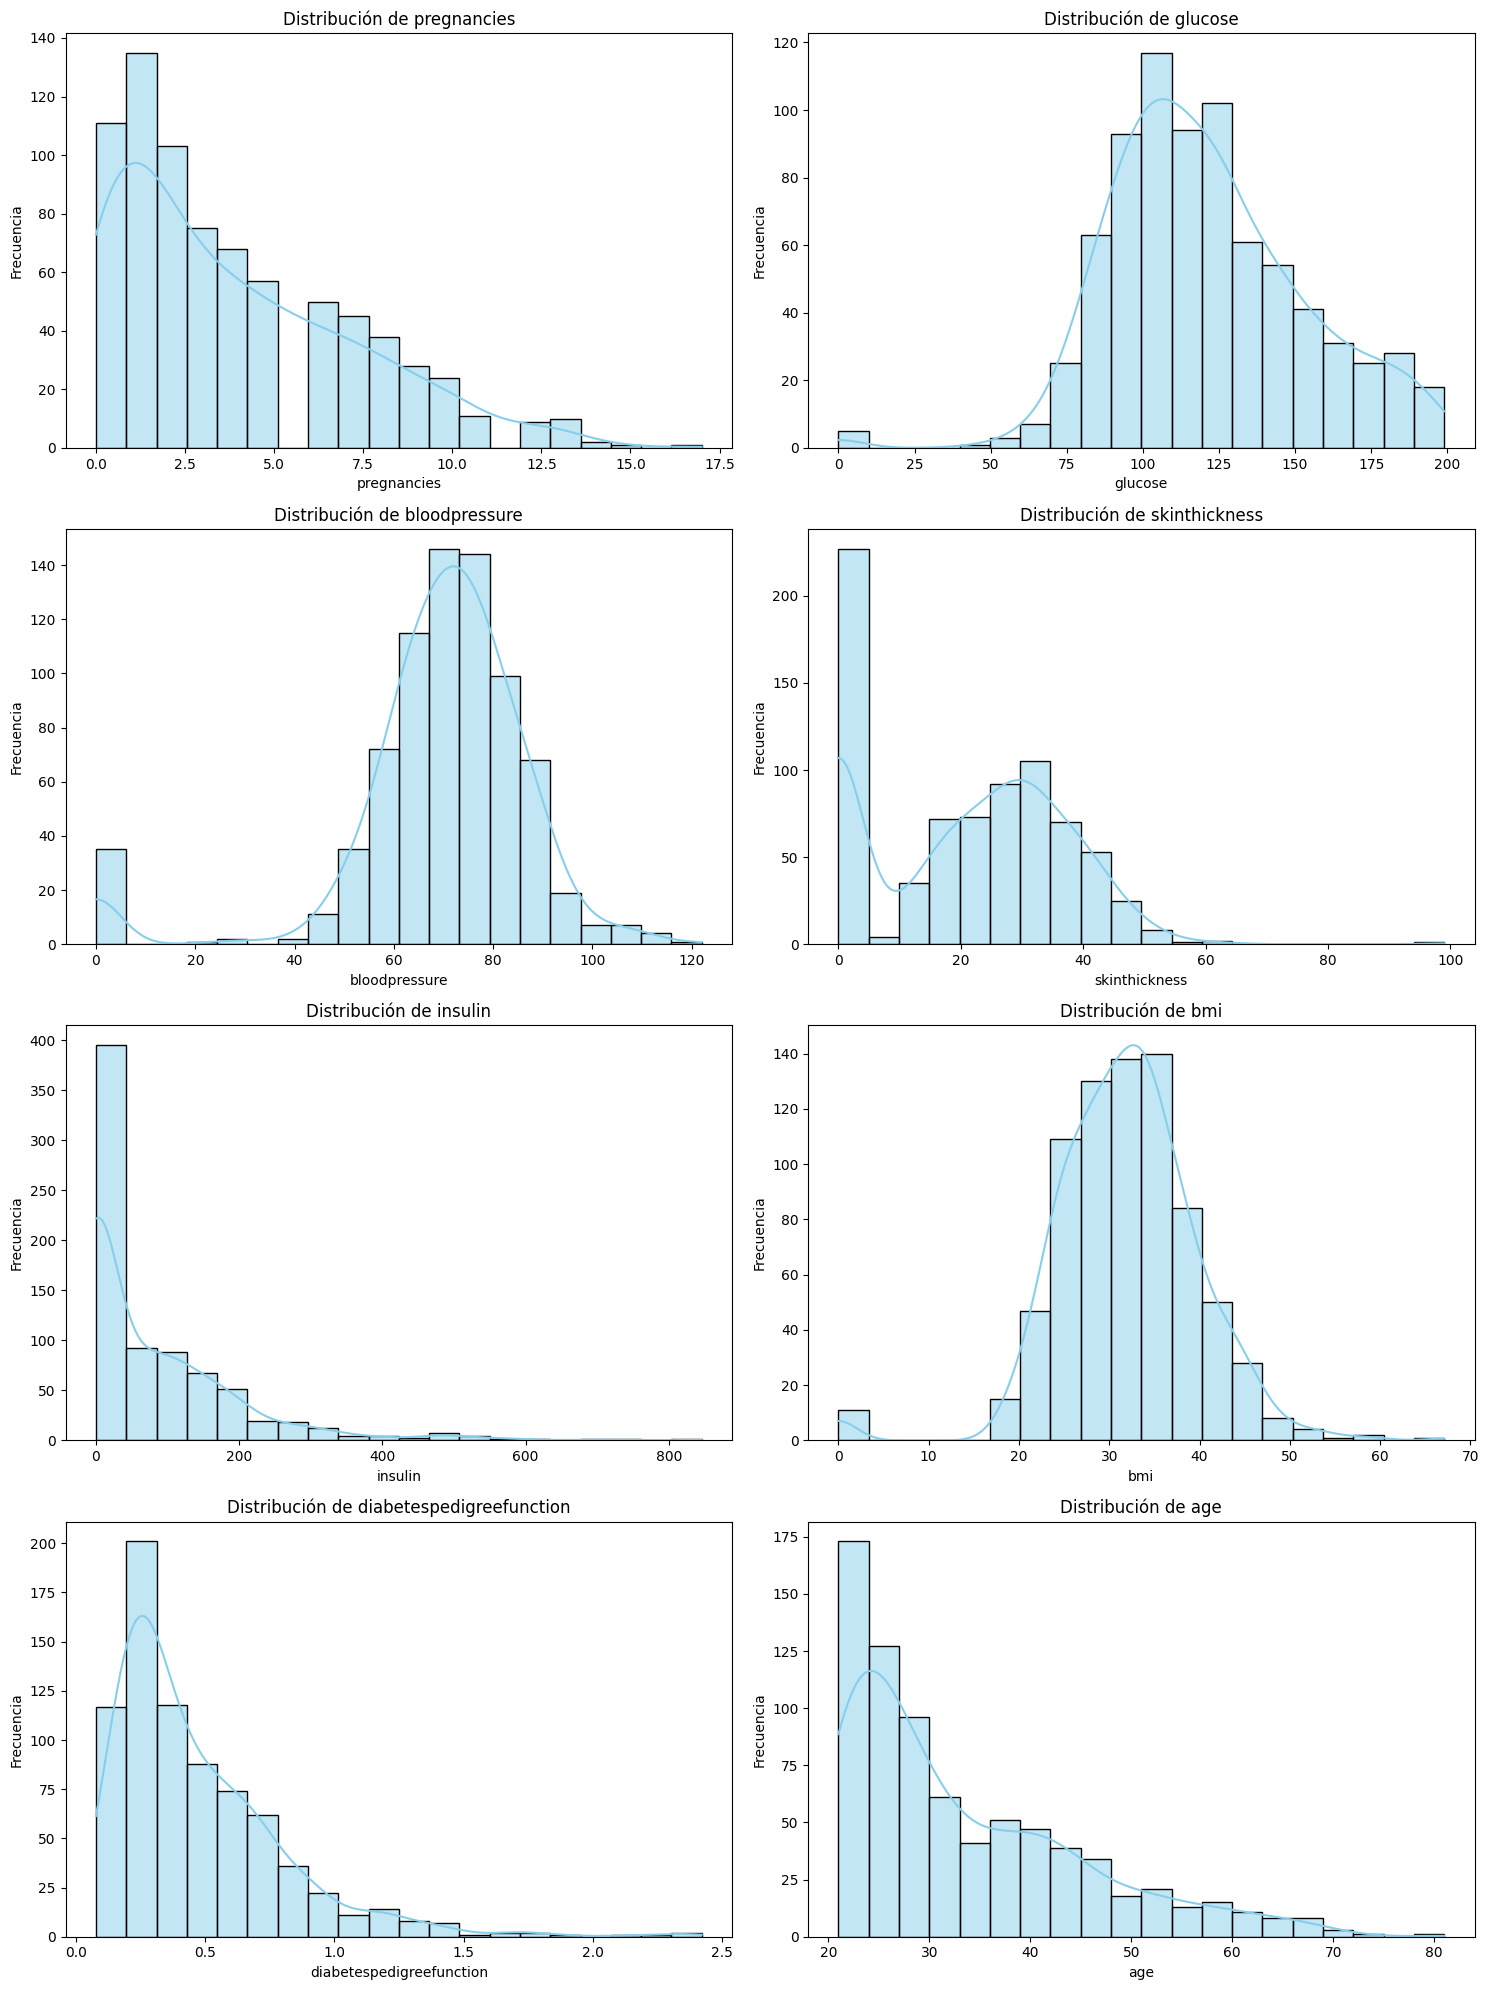

In [42]:
# Determinar cuántas columnas y filas se necesitan
n_columns = 2
n_rows = np.ceil(len(df.select_dtypes(include=['int64', 'float64']).columns) / n_columns).astype(int)

# Crear subgráficas
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5 * n_rows))

# Aplanar el arreglo de ejes para recorrerlos fácilmente
axes = axes.flatten()

# Graficar histograma para cada columna numérica
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    sns.histplot(df[column], kde=True, bins=20, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes restantes si hay subgráficas vacías
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()
plt.show()

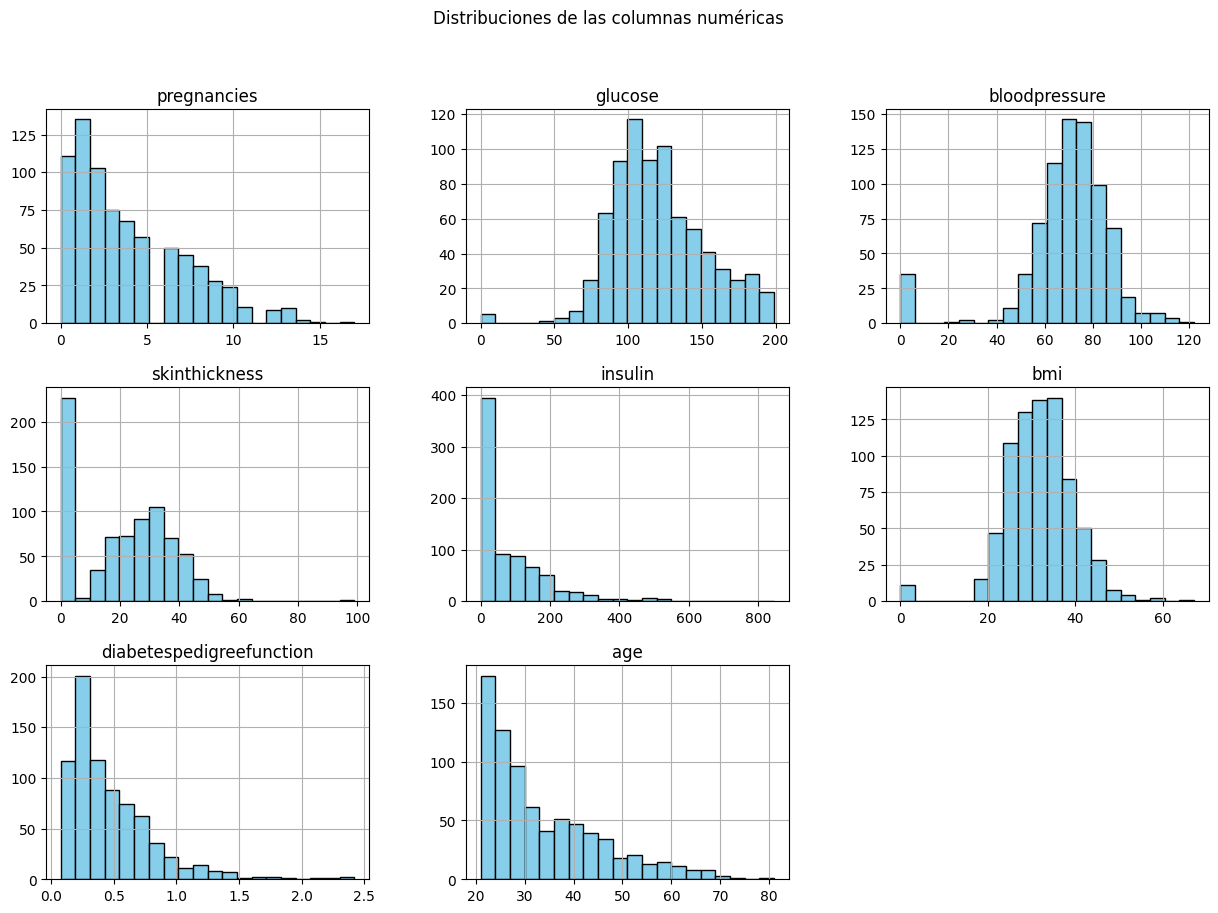

In [43]:
# Graficar histogramas para todas las columnas numéricas
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribuciones de las columnas numéricas')
plt.show()


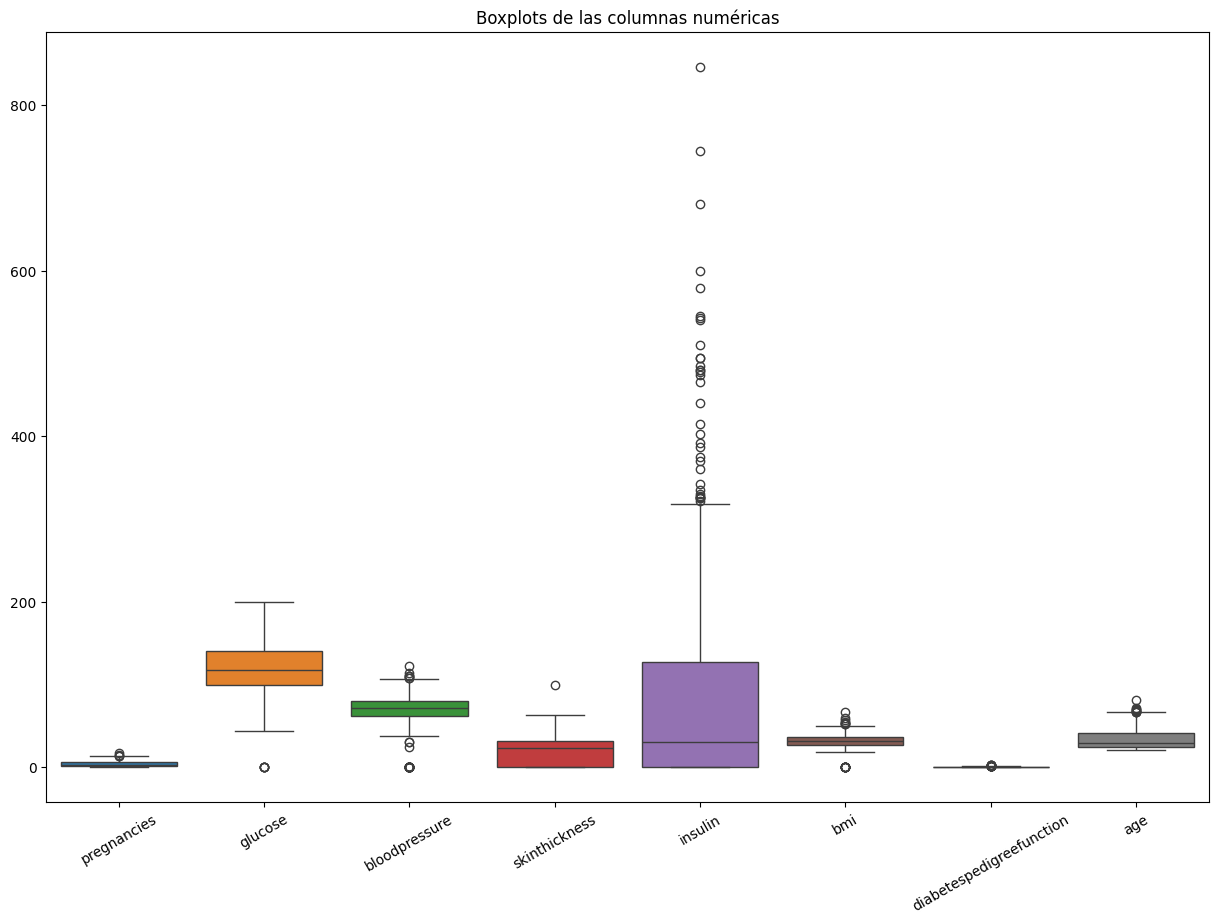

In [44]:
# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplots de las columnas numéricas')
plt.xticks(rotation=30)
plt.show()


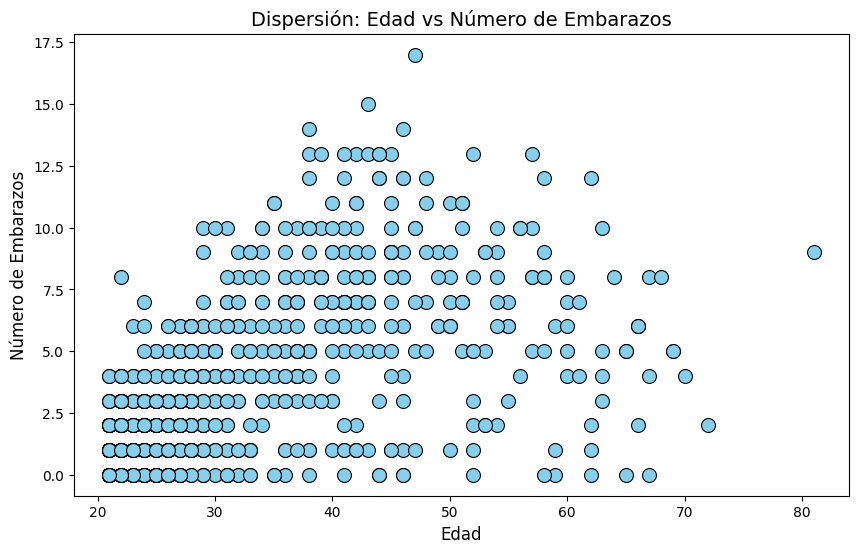

In [45]:
# Graficar dispersión de Edad vs Número de Embarazos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='pregnancies', color='skyblue', s=100, edgecolor='black')

# Títulos y etiquetas
plt.title('Dispersión: Edad vs Número de Embarazos', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Número de Embarazos', fontsize=12)

# Mostrar el gráfico
plt.show()

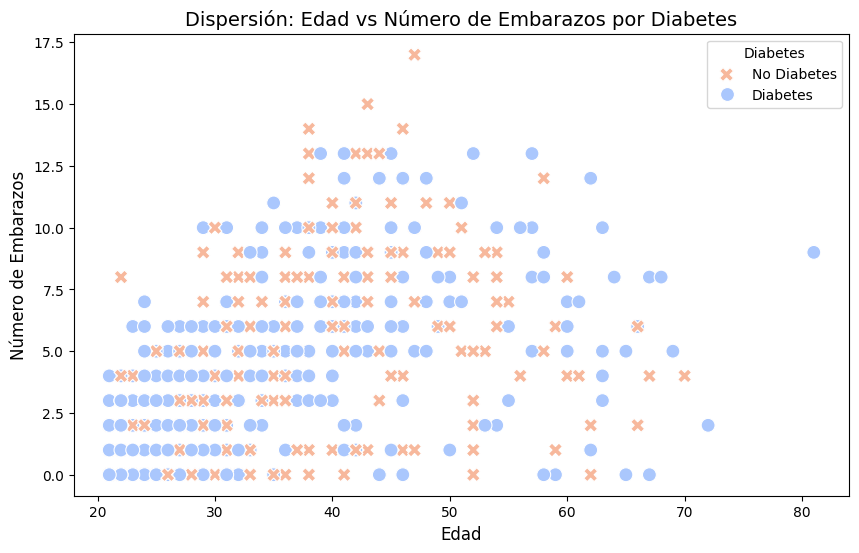

In [46]:
# Graficar dispersión comparando Edad, Número de Embarazos y si tiene diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='pregnancies', hue='outcome', palette='coolwarm', style='outcome', markers={0: 'o', 1: 'X'}, s=100)

# Títulos y etiquetas
plt.title('Dispersión: Edad vs Número de Embarazos por Diabetes', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Número de Embarazos', fontsize=12)
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes', 'Diabetes'])

# Mostrar el gráfico
plt.show()


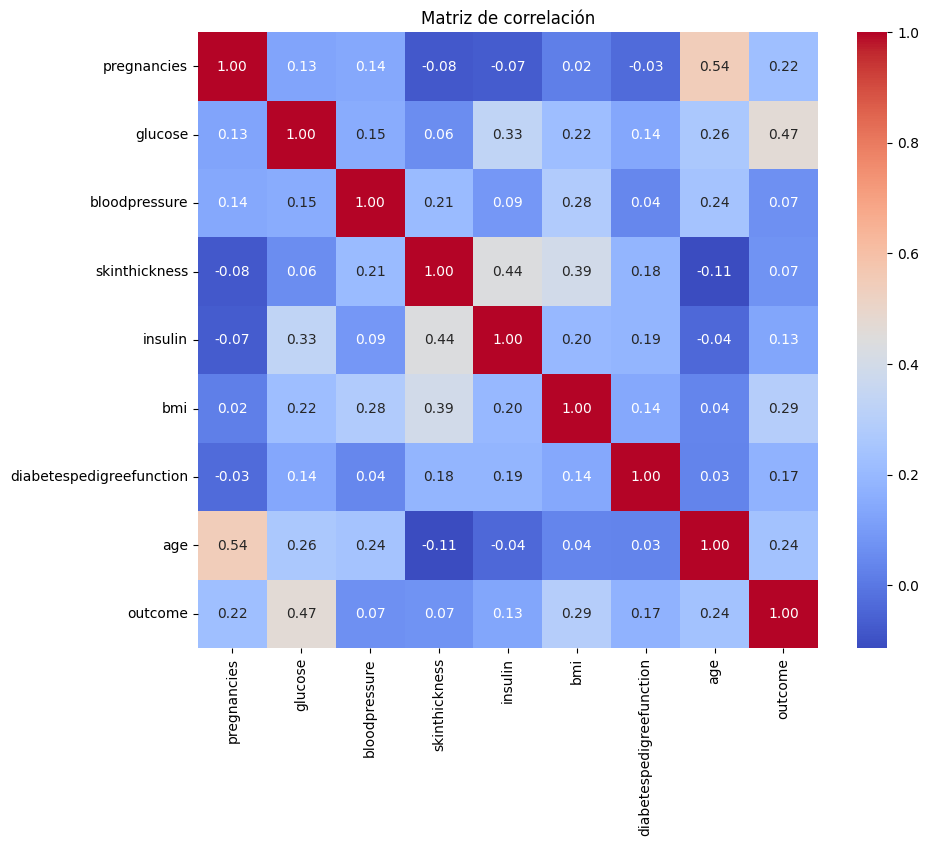

In [47]:
# Matriz de correlación
corr = df.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


In [48]:
# Calcular la correlación entre la variable target y las demás variables
correlations = df.corr()
target_corr = correlations['outcome'].sort_values(ascending=False)

# Mostrar las correlaciones con Outcome
print(target_corr)


outcome                    1.00
glucose                    0.47
bmi                        0.29
age                        0.24
pregnancies                0.22
diabetespedigreefunction   0.17
insulin                    0.13
skinthickness              0.07
bloodpressure              0.07
Name: outcome, dtype: float64


### **3. Implementación de Modelos:**
* Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset..


In [49]:

# DataFrame es df y la columna target es 'outcome'
X = df.drop(columns=['outcome'])  # Las características
y = df['outcome']  # La variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo escalador
X_test_scaled = scaler.transform(X_test)


In [50]:
# Entrenamiento y evaluación de modelos,con Random Forest y XGBoost

# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Entrenar XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar los modelos
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Calcular ROC-AUC
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:,1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])

print("Random Forest - ROC-AUC:", roc_auc_rf)
print("XGBoost - ROC-AUC:", roc_auc_xgb)

Random Forest - Accuracy: 0.7207792207792207
XGBoost - Accuracy: 0.7077922077922078
Random Forest - Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.78      0.78        99
        True       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

XGBoost - Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.74      0.76        99
        True       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Random Forest - ROC-AUC: 0.8134986225895318
XGBoost - ROC-AUC: 0.766574839302112


## Análisis de los resultados

1. **Accuracy:**
* Random Forest: 72.08%
* XGBoost: 70.78%

Aunque ambos modelos tienen un rendimiento similar, Random Forest tiene una ligera ventaja en términos de accuracy.

2. **Classification Report:**
**Random Forest:**
* False (No diabetes):
  * Precisión: 0.79
  * Recall: 0.78
  * F1-score: 0.78
* True (Con diabetes):
  * Precisión: 0.61
  * Recall: 0.62
  * F1-score: 0.61

**XGBoost:**
* False (No diabetes):
  * Precisión: 0.79
  * Recall: 0.74
  * F1-score: 0.76
* True (Con diabetes):
  * Precisión: 0.58
  * Recall: 0.65
  * F1-score: 0.62

***Observaciones:***

* Ambos modelos tienen un buen desempeño en la clase False (No diabetes), pero Random Forest tiene una ligera ventaja en términos de precision y recall.
* Para la clase True (Con diabetes), XGBoost tiene un recall más alto (0.65 frente a 0.62 de Random Forest), lo que significa que XGBoost es mejor para identificar a las personas que realmente tienen diabetes, aunque Random Forest tiene una mayor precisión en este caso.

3. **ROC-AUC:**
* Random Forest: 0.81
* XGBoost: 0.77

***Observaciones:***

* Random Forest tiene una mejor ROC-AUC, lo que indica que tiene una mayor capacidad para distinguir entre las clases de manera general.
  
Por lo expuesto se deduce que: 
* Random Forest parece ser el mejor modelo en general, ya que tiene un mayor accuracy, un mejor ROC-AUC y un rendimiento más equilibrado en ambas clases (False y True).
XGBoost presenta un recall ligeramente mejor para la clase True (con diabetes), lo que podría ser beneficioso si el objetivo es identificar más casos de diabetes a expensas de una ligera disminución en la precisión.
* Dado que el modelo Random Forest tiene un rendimiento global superior, sería más adecuado para este dataset en particular, aunque XGBoost podría ser considerado si se prioriza la detección de casos positivos (diabetes) a pesar de un ligero costo en precisión.

### **Pruebas de Optimización del Modelo:**
* Optimizar el modelo seleccionado utilizando GridSearchCV.

In [51]:
# Definir los parámetros a probar
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier()

# Ejecutar GridSearchCV para encontrar los mejores parámetros
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Mejor conjunto de parámetros
print("Mejores parámetros Random Forest:", grid_search_rf.best_params_)
print("Mejor score Random Forest:", grid_search_rf.best_score_)


Mejores parámetros Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mejor score Random Forest: 0.7915367186458749


In [52]:

# 1. Verificar valores nulos
print("Valores nulos en X_train:")
print(X_train.isnull().sum())  # Verificar valores nulos en X_train
print("\nValores nulos en y_train:")
print(y_train.isnull().sum())  # Verificar valores nulos en y_train

# 2. Imputar valores nulos con la moda (valor más frecuente)
imputer = SimpleImputer(strategy='most_frequent')  # Usamos la moda para imputar
X_train = imputer.fit_transform(X_train)

# 3. Verificar tipos de datos
print("\nTipos de datos en X_train después de imputación:")
print(pd.DataFrame(X_train).dtypes)  # Comprobar si todas las columnas son numéricas después de la imputación

# 4. Estandarización (si es necesario)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


Valores nulos en X_train:
pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
dtype: int64

Valores nulos en y_train:
0

Tipos de datos en X_train después de imputación:
0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object


In [53]:
# Definir el modelo base
rf = RandomForestClassifier()

# Definir los parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Usar 'sqrt' o 'log2' en lugar de 'auto'
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Ajustar el modelo con los mejores parámetros encontrados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Mejor score: 0.7866453418632547


In [54]:
# Crear un objeto LazyClassifier
clf = LazyClassifier()

# Ajustar el modelo con los datos de entrenamiento
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Ver los resultados
print(models)


100%|██████████| 31/31 [00:00<00:00, 41.70it/s]

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [55]:
# Prueba imputando  valores que sean menores al mínimo recomendado

# Definir los umbrales mínimos para cada variable
umbral_minimo = {
    'pregnancies': 0,  # No debería haber embarazos negativos
    'glucose': 20,      # Un valor razonable para glucosa en sangre
    'bloodpressure': 40,  # Presión arterial mínima
    'skinthickness': 0,  # No debería haber valores negativos o demasiado bajos
    'insulin': 5,       # Nivel mínimo de insulina razonable
    'bmi': 10,          # El BMI mínimo razonable
    'diabetespedigreefunction': 0,  # Función de pedigrí mínima
    'age': 0            # Edad no puede ser negativa
}


# Reemplazar los valores que no cumplen con los umbrales por NaN
for col, min_value in umbral_minimo.items():
    df[col] = df[col].apply(lambda x: np.nan if x < min_value else x)

# Verificamos los valores reemplazados por NaN
print(df)

# Paso 2: Imputar valores nulos con la mediana en columnas numéricas
numerical_cols = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 
                  'insulin', 'bmi', 'diabetespedigreefunction', 'age']

# Crear el imputador para la mediana
imputer = SimpleImputer(strategy='median')

# Imputamos los valores nulos en las columnas numéricas
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verificamos los resultados
print(df)


     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6   148.00          72.00             35      NaN 33.60   
1              1    85.00          66.00             29      NaN 26.60   
2              8   183.00          64.00              0      NaN 23.30   
3              1    89.00          66.00             23    94.00 28.10   
4              0   137.00          40.00             35   168.00 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10   101.00          76.00             48   180.00 32.90   
764            2   122.00          70.00             27      NaN 36.80   
765            5   121.00          72.00             23   112.00 26.20   
766            1   126.00          60.00              0      NaN 30.10   
767            1    93.00          70.00             31      NaN 30.40   

     diabetespedigreefunction  age  outcome  
0                        0.63   50     True  
1                  

In [56]:

# DataFrame es df y la columna target es 'outcome'
X = df.drop(columns=['outcome'])  # Las características
y = df['outcome']  # La variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo escalador
X_test_scaled = scaler.transform(X_test)


In [57]:
# Entrenamiento y evaluación de modelos,con Random Forest y XGBoost

# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Entrenar XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar los modelos
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Calcular ROC-AUC
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:,1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])

print("Random Forest - ROC-AUC:", roc_auc_rf)
print("XGBoost - ROC-AUC:", roc_auc_xgb)

Random Forest - Accuracy: 0.7467532467532467
XGBoost - Accuracy: 0.7207792207792207
Random Forest - Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.80      0.80        99
        True       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

XGBoost - Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.74      0.77        99
        True       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154

Random Forest - ROC-AUC: 0.814141414141414
XGBoost - ROC-AUC: 0.7680440771349862


In [58]:
# Probando imputar por regresion lineal

# Definir los umbrales mínimos para cada variable
umbral_minimo = {
    'pregnancies': 0,  # No debería haber embarazos negativos
    'glucose': 20,      # Un valor razonable para glucosa en sangre
    'bloodpressure': 40,  # Presión arterial mínima
    'skinthickness': 0,  # No debería haber valores negativos o demasiado bajos
    'insulin': 5,       # Nivel mínimo de insulina razonable
    'bmi': 10,          # El BMI mínimo razonable
    'diabetespedigreefunction': 0,  # Función de pedigrí mínima
    'age': 0            # Edad no puede ser negativa
}


# Reemplazar los valores que no cumplen con los umbrales por NaN
for col, min_value in umbral_minimo.items():
    df[col] = df[col].apply(lambda x: np.nan if x < min_value else x)

# Verificamos los valores reemplazados por NaN
print(df)

# Paso 1: Imputación por regresión lineal

# Identificar las columnas con valores nulos
numerical_cols = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 
                  'insulin', 'bmi', 'diabetespedigreefunction', 'age']
columns_with_na = df[numerical_cols].isnull().sum()

# Para cada columna con NaN, realizamos la imputación con regresión lineal
for col in columns_with_na[columns_with_na > 0].index:
    # Crear el conjunto de datos sin los valores nulos en la columna 'col'
    df_train = df[df[col].notnull()]
    
    # X es el conjunto de características (todas las demás columnas numéricas)
    X_train = df_train.drop(columns=['outcome', col])
    y_train = df_train[col]
    
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Para las filas con NaN en la columna 'col', predecir los valores faltantes
    df_missing = df[df[col].isnull()]
    X_missing = df_missing.drop(columns=['outcome', col])
    df.loc[df[col].isnull(), col] = model.predict(X_missing)

# Verificamos los resultados
print("Datos con imputación por regresión lineal:\n", df)

# Paso 2: División en entrenamiento y prueba
X = df.drop(columns=['outcome'])  # Las características
y = df['outcome']  # La variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Entrenamiento y evaluación de modelos, con Random Forest y XGBoost

# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Entrenar XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)




     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0           6.00   148.00          72.00          35.00   125.00 33.60   
1           1.00    85.00          66.00          29.00   125.00 26.60   
2           8.00   183.00          64.00           0.00   125.00 23.30   
3           1.00    89.00          66.00          23.00    94.00 28.10   
4           0.00   137.00          40.00          35.00   168.00 43.10   
..           ...      ...            ...            ...      ...   ...   
763        10.00   101.00          76.00          48.00   180.00 32.90   
764         2.00   122.00          70.00          27.00   125.00 36.80   
765         5.00   121.00          72.00          23.00   112.00 26.20   
766         1.00   126.00          60.00           0.00   125.00 30.10   
767         1.00    93.00          70.00          31.00   125.00 30.40   

     diabetespedigreefunction   age  outcome  
0                        0.63 50.00     True  
1                

In [59]:
# Evaluar los modelos
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Calcular ROC-AUC
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:,1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:,1])

print("Random Forest - ROC-AUC:", roc_auc_rf)
print("XGBoost - ROC-AUC:", roc_auc_xgb)

Random Forest - Accuracy: 0.7467532467532467
XGBoost - Accuracy: 0.7207792207792207
Random Forest - Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.80      0.80        99
        True       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

XGBoost - Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.74      0.77        99
        True       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154

Random Forest - ROC-AUC: 0.814141414141414
XGBoost - ROC-AUC: 0.7680440771349862
